## Observations and Insights 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.


249

In [87]:
study_data_complete["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


,Counts of Mouse ID
g989,13
p136,10
y769,10
u196,10
x402,10


In [3]:
study_data_complete_duplicated = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"]
study_data_complete_duplicated

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID

# check the mouse data for ID


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [4]:
#Get all the data for the duplicate mouse ID.
duplicated_df = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
#Setting index to Mouse ID
duplicated_df.set_index("Mouse ID", inplace=True)
duplicated_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_df = study_data_complete.loc[study_data_complete["Mouse ID" ]!= "g989"]


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_study_data_df[["Mouse ID"]].nunique()

Mouse ID    248
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# series variable to hold Tumor Volume Data grouped by Drug Regimen

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen


# variable to hold median Tumor Volume Data Grouped by Drug Regimen


# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen


# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen


# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen


# Convert to DataFrame

# Preview DataFrame


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen

tumor_mean = clean_study_data_df.groupby(by="Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = clean_study_data_df.groupby(by="Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance = clean_study_data_df.groupby(by="Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_stddev = clean_study_data_df.groupby(by="Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem = clean_study_data_df.groupby(by="Drug Regimen").sem()["Tumor Volume (mm3)"]

#create and display the summary DF
summary_df1 = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                            "Median Tumor Volume": tumor_median,
                           "Tumor Volume Variance" : tumor_variance,
                           "Tumor Volume Stdev": tumor_stddev,
                           "Tumor Volume SEM": tumor_sem})

summary_df1


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Stdev_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#Use the aggregation method

summary_df1 = clean_study_data_df.groupby(by = "Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_df1

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# list of unique drug regimens

# drug regimen as x-axis values for plotting

# drop all duplicate mice


# get mice counts per drug


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


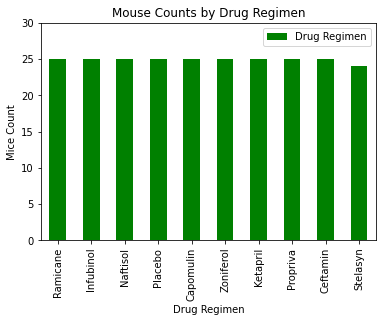

In [10]:
# plot the mouse counts for each drug using pandas


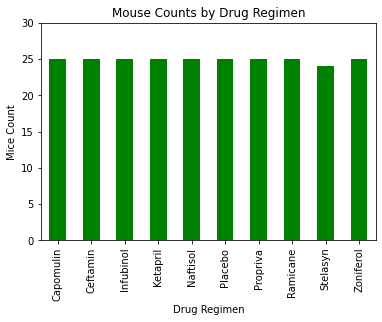

In [50]:
# list of unique drug regimens
unique_drug_regimes = study_data_complete.groupby(by="Drug Regimen").nunique() ["Mouse ID"]

unique_drug_regimes.plot(kind="bar", color="g")
plt.title("Mouse Counts by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.ylim(0, 30)
plt.show()

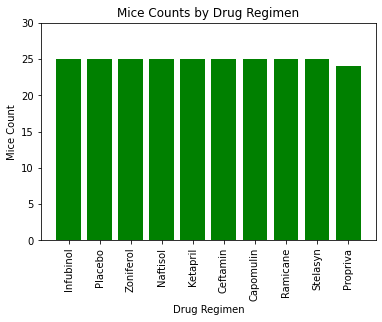

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen


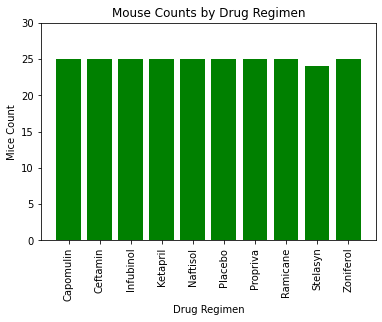

In [24]:
plt.bar(unique_drug_regimes.index.values, unique_drug_regimes.values, color="g")


tick_locations = [x for x in x_axis]
plt.xticks(unique_drug_regimes.index, rotation="vertical")
plt.title("Mouse Counts by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.ylim(0, 30)
plt.show()


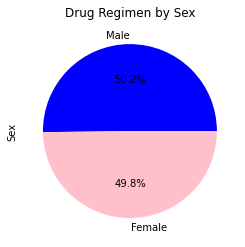

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

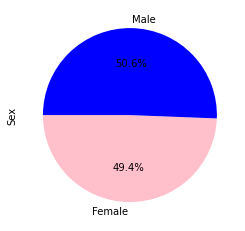

In [45]:
group_by_gender = study_data_complete.groupby("Sex").count() ["Mouse ID"]
group_by_gender.plot(kind="pie", autopct='%1.1f%%', colors=["pink","blue"], startangle=180)
plt.ylabel("Sex")

group_by_gender

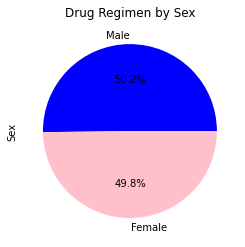

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

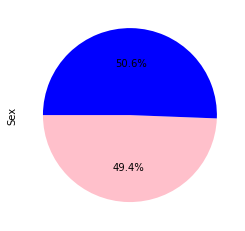

In [48]:
plt.pie(group_by_gender.values, autopct='%1.1f%%', colors=["pink","blue"], startangle=180)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin


# isolated view of just capomulin for later use


# Reset index so drug regimen column persists after inner merge


# get mouse count per drug


# Start by getting the last (greatest) timepoint for each mouse


Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
Name: Timepoint, dtype: int64

In [117]:
# Make a copy of the original dataframe
study_data_for_quartiles = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

#Set the index to Drug Regimen
study_data_for_quartiles.set_index("Drug Regimen", inplace=True)

#Filter to use only ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
study_data_for_quartiles = study_data_for_quartiles.loc[regimen_list]

# isolated view of just capomulin for later use
capomulin = study_data_for_quartiles.loc["Capomulin"]

# Reset index so drug regimen column persists after inner merge
study_data_for_quartiles.reset_index(inplace=True)

# get mouse count per drug
mouse_count_by_drug = study_data_for_quartiles.groupby(by="Drug Regimen").count() ["Mouse ID"]


# Start by getting the last (greatest) timepoint for each mouse
max_time_point_mouse_id = study_data_for_quartiles.groupby(by="Mouse ID").max() ["Timepoint"]

#Alternative way to get the same data
#max_time_point_mouse_id = study_data_for_quartiles.groupby(by="Mouse ID")["Timepoint"].max() 

max_time_point_mouse_id = max_time_point_mouse_id.reset_index()


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,0,45.000000,0,Female,9,22
1,Capomulin,j246,0,45.000000,0,Female,21,21
2,Capomulin,r554,0,45.000000,0,Female,8,17
3,Capomulin,s185,0,45.000000,0,Female,3,17
4,Capomulin,b742,0,45.000000,0,Male,7,21
...,...,...,...,...,...,...,...,...
809,Ceftamin,k210,45,68.923185,3,Male,15,28
810,Ceftamin,x822,45,61.386660,3,Male,3,29
811,Ceftamin,l733,45,64.299830,1,Female,4,30
812,Ceftamin,o287,45,59.741901,4,Male,2,28


In [15]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# show all rows of data


,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
u153,Ceftamin,0,45.000000,0,Female,11,25
b447,Ceftamin,0,45.000000,0,Male,2,30
x226,Ceftamin,0,45.000000,0,Male,23,28
t573,Ceftamin,0,45.000000,0,Female,15,27
c326,Infubinol,5,36.321346,0,Female,18,25
w678,Ramicane,5,43.166373,0,Female,5,24
v339,Infubinol,5,46.250112,0,Male,20,26
m756,Infubinol,5,47.010364,1,Male,19,30
o813,Infubinol,5,45.699331,0,Male,24,28


In [121]:
merged_df = max_time_point_mouse_id.merge(study_data_for_quartiles, on=["Mouse ID", "Timepoint"])
pd.set_option("display.max_rows",None)
merged_df


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,45,Infubinol,67.973419,2,Female,20,23
1,a251,45,Infubinol,65.525743,1,Female,21,25
2,a275,45,Ceftamin,62.999356,3,Female,20,28
3,a411,45,Ramicane,38.407618,1,Male,3,22
4,a444,45,Ramicane,43.047543,0,Female,10,25
5,a520,45,Ramicane,38.810366,1,Male,13,21
6,a577,30,Infubinol,57.031862,2,Female,6,25
7,a644,45,Ramicane,32.978522,1,Female,7,17
8,a685,45,Infubinol,66.083066,3,Male,8,30
9,b128,45,Capomulin,38.982878,2,Female,9,22


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
 

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
u153,Ceftamin,45.000000
b447,Ceftamin,45.000000
x226,Ceftamin,45.000000
t573,Ceftamin,45.000000
c326,Infubinol,36.321346


In [149]:

#GOAL - To analyse the tumor volume data using box plotes - will need to create the quartiles for the tumor volume
#To create the tumor volume quartilee, first get all the values in a list and use the quanitle function to get teh quartiles

#Get all the tumpoer volume in a list
tumor_vol = merged_df["Tumor Volume (mm3)"]

#calculate the quartiles
tumor_quartile = tumor_vol.quantile(q=[.25, .50, .75])

#detemine lower, upper, anmd inner quartile valies
lower_q = tumor_quartile[.25]
upper_q = tumor_quartile[.75]
IQR = upper_q - lower_q
median = tumor_vol.median()

#calculate the upper and lower whisker values
lower_whisker  = lower_q - (1.5 *IQR)
upper_whisker = upper_q + (1.5 *IQR)

#print the values

print(f"The lower quartile of Tumor Volume is: {lower_q}")
print(f"The upper quartile of Tumor Volume is: {upper_q}")
print(f"The interquartile range of Tumor Volume is: {IQR}")
print(f"The the median of Tumor Volume is: {median}")
print(f"Values below {lower_whisker} could be outliers.")
print(f"Values above {upper_whisker} could be outliers.")
                    

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The the median of Tumor Volume is: 45.0
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [17]:
# Determine outliers using upper and lower bounds


The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The the median of Tumor Volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [150]:
# add subset 
drug_labels = regimen_list

#create a list of list for the tumor volumes; tumor volumes for each Drug Regimen
tumor_vol_by_drug = []
for drug in drug_labels:
    tumor_volume_list = study_data_for_quartiles.loc[study_data_for_quartiles["Drug Regimen"] == drug, ["Tumor Volume (mm3)"]]
    tumor_vol_by_drug.append(tumor_volume_list)





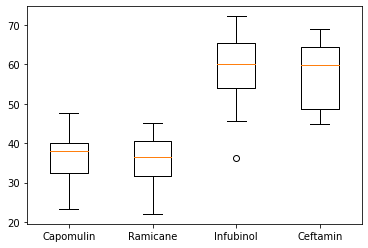

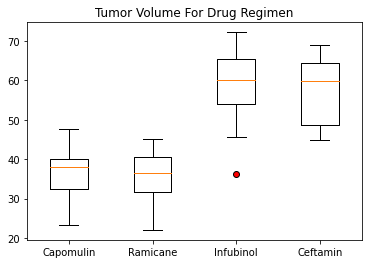

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



ValueError: cannot copy sequence with size 230 to array axis with dimension 1

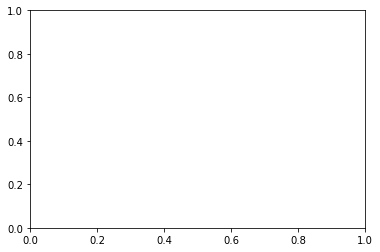

In [151]:
#generate box plot

plt.boxplot(tumor_vol_by_drug, drug_labels)

## Line and Scatter Plots

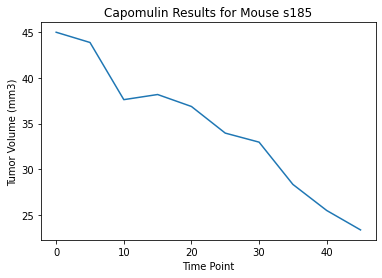

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#change index to mouse ID 

#remove other mouse IDs so only s185 shows


#set the x-axis equal to the Timepoint and y-axis to Tumor Volume


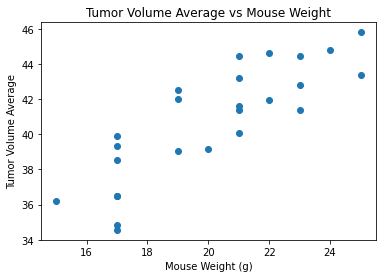

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume


# establish x-axis value for the weight of the mice


# produce scatter plot of the data


## Correlation and Regression

The correlation between both factors is 0.84


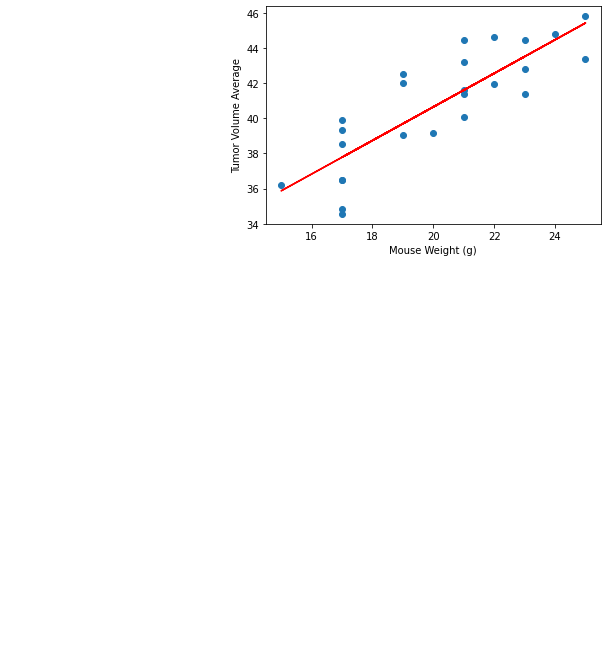

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg


#print St. Pearson Correlation Coefficient

# establish linear regression values

# linear regression line 


# scatter plot of the data
